Research Question:Does the literacy rate play a role in the part-time employment rate? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

Importing the data from the UN Data Collections for literacy and later for employment. I only want to use certain columns so I will select specific columns within each column set that I feel will achieve the best data for my predictions and results. 

In [2]:
literacy=pd.read_csv('UNdata_Export_20190226_203636225.csv', usecols=['Country or Area','Subgroup','Year','Value'])
literacy.columns = ['country','gender','year','value']
literacy[0:5]


,country,gender,year,value
0,Afghanistan,Female 15-24 yr,2000.0,18.4
1,Afghanistan,Male 15-24 yr,2000.0,50.8
2,Albania,Female 15-24 yr,2001.0,99.5
3,Albania,Male 15-24 yr,2001.0,99.4
4,Algeria,Female 15-24 yr,2002.0,86.1


In [3]:
employment=pd.read_csv('UNdata_Export_parttime_employment.csv',usecols=['Country or Area','Subgroup','Year','Value'])
employment.columns = ['country','gender','year','value']
employment[0:5]

,country,gender,year,value
0,Argentina,Female 15+ yr,2003.0,42.7
1,Argentina,Female 15+ yr,2002.0,43.1
2,Argentina,Female 15+ yr,2001.0,34.6
3,Argentina,Female 15+ yr,2000.0,32.7
4,Argentina,Female 15+ yr,1999.0,32.5


Here are merged both data sets together and had them organize on the shared column of country and year. 

In [4]:
import pandas as pd
df = pd.merge(literacy, employment, how='outer', sort=True, on=['country','year'])
df[30:35]

,country,gender_x,year,value_x,gender_y,value_y
30,Bahrain,Female 15-24 yr,1991.0,96.6,NaN,NaN
31,Bahrain,Male 15-24 yr,1991.0,97.3,NaN,NaN
32,Bahrain,Female 15-24 yr,2001.0,97.3,NaN,NaN
33,Bahrain,Male 15-24 yr,2001.0,96.8,NaN,NaN
34,Bangladesh,Female 15-24 yr,1991.0,38.0,NaN,NaN


I chose set the index in alphabetical order of countries and then within the countries by year to have a better visual of the data. 

In [6]:
df2 = df.set_index(['country','year'])
df2[0:20]

gender_x  value_x       gender_y  value_y
country     year                                                    
Afghanistan 2000.0  Female 15-24 yr     18.4            NaN      NaN
            2000.0    Male 15-24 yr     50.8            NaN      NaN
Albania     2001.0  Female 15-24 yr     99.5            NaN      NaN
            2001.0    Male 15-24 yr     99.4            NaN      NaN
Algeria     2002.0  Female 15-24 yr     86.1            NaN      NaN
            2002.0    Male 15-24 yr     94.1            NaN      NaN
Angola      2001.0  Female 15-24 yr     63.2            NaN      NaN
            2001.0    Male 15-24 yr     83.7            NaN      NaN
Argentina   1991.0  Female 15-24 yr     98.5            NaN      NaN
            1991.0    Male 15-24 yr     98.1            NaN      NaN
            1998.0              NaN      NaN  Female 15+ yr     32.6
            1998.0              NaN      NaN    Male 15+ yr     11.8
            1999.0              NaN      NaN  Female 15+ yr     32.5
            1999.0              NaN      NaN    Male 15+ yr     12.3
            2000.0              NaN      NaN  Female 15+ yr     32.7
            2000.0              NaN      NaN    Male 15+ yr     13.4
            2001.0  Female 15-24 yr     99.1  Female 15+ yr     34.6
            2001.0  Female 15-24 yr     99.1    Male 15+ yr     14.9
            2001.0    Male 15-24 yr     98.7  Female 15+ yr     34.6
            2001.0    Male 15-24 yr     98.7    Male 15+ yr     14.9

Chose to use the scatter plot to compares the values_x (literacy) to value_y(employment). This scatter plot shows that the majority of the population is above 95% literacy rate but most of them are only 10-20% employed while there are outliers for higher employment rates and literacy rates 85% and higher for the majority of those outliers. 

Text(0.5, 1.0, 'Literacy vs Part-Time Employment')

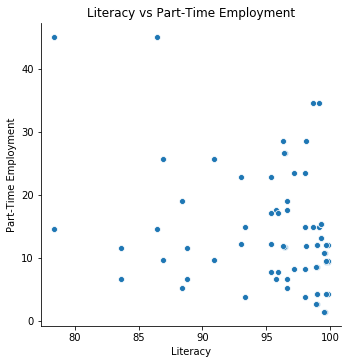

In [8]:
g= sns.relplot(x='value_x',y='value_y', data=df2)
g.set_ylabels("Part-Time Employment") 
g.set_axis_labels("Literacy")
plt.title ('Literacy vs Part-Time Employment')    

The scatter plot is then broken down further into gender and age, comparing part-time employement rate and literacy rate and then by gender as well. The plots show that women hold more part-time jobs and have a lower average literacy rate then their counter parts. 

Hypothesis: I believe that the data will show an inverse effect. The countries with high literacy rates for either gender will show a lower part-time employment rate and those with low literacy rates will show higher part-time employment work. Due to families needing financial support and unable to continue sending their children to school after a certain age. 

Text(0.5, 1.0, 'Part-Time Employment Rate Breakdown by Gender/Age and Country ')

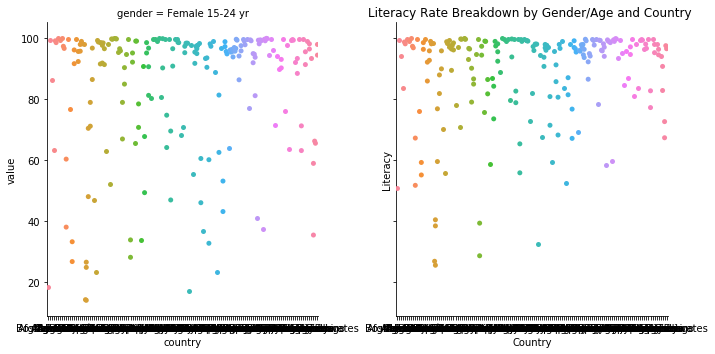

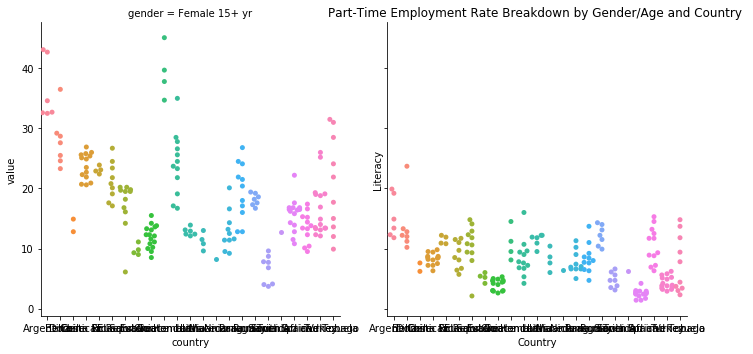

In [13]:
sns.catplot(x='country',y='value',col='gender', kind='swarm', data= literacy)
plt.ylabel("Literacy") 
plt.xlabel("Country")
plt.title ('Literacy Rate Breakdown by Gender/Age and Country ')    
sns.catplot(x='country',y='value',col='gender', kind='swarm', data= employment)
plt.ylabel("Literacy") 
plt.xlabel("Country")
plt.title ('Part-Time Employment Rate Breakdown by Gender/Age and Country ')

I wanted to look at the data by year and gender with the median of the data as well as the outiers, so I chose to use seaborns boxplot. As you can see some of the data is very condensed and some is very spread out with many outliers. There can be a few reasons for this. 1. What regions of these countries did they conduct the interviews. 2. What was the economic status of these individuals.

Text(0.5, 1.0, 'Part-Time Employment Rate Breakdown by Gender/Age and Country ')

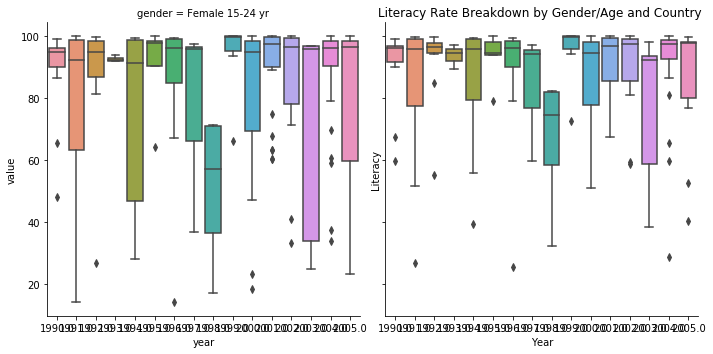

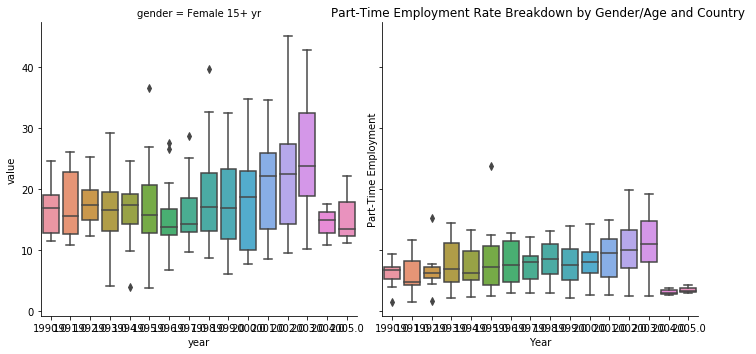

In [19]:
sns.catplot(x="year", y= "value", col= "gender",kind="box", data= literacy)
plt.ylabel("Literacy") 
plt.xlabel("Year")
plt.title ('Literacy Rate Breakdown by Gender/Age and Country ') 
sns.catplot(x="year", y= "value", col= "gender",kind="box", data= employment)
plt.ylabel("Part-Time Employment") 
plt.xlabel("Year")
plt.title ('Part-Time Employment Rate Breakdown by Gender/Age and Country ')

To further research this topic I would look into a few different factors I believe could make a difference in literacy and employment: 
1. Household size- number of children
2. Household income
3. Break it down by city vs rural and see it that effects the rates
4. Education level of the parents
5. Religion
By researching these factors more deeply it would allow us to make a stronger statement on the difference in literacy vs work. Using different means of collection would help provide information, however a census I think woud be the most reliable form of information. 

To keep information accurate across the genders and years I would make sure that the count for all recieved data is the same as too avoid skewed data. Complete gathering the data at the completion of each calendar year to keep the data even year after year. 